# Optymalizacja reguły PPMF 

In [134]:
library(tidyverse)
library(magrittr)
library(furrr)
library(here)
library(gghighlight)
options(repr.plot.width=20, repr.plot.height=10)

In [150]:
source(here::here("src", "alg-exp", "cma-es-csa.R"))
source(here::here("src", "alg-exp", "cma-es-expth.R"))
source(here::here("src", "exp-utils.R"))
source(here::here("src", "data-utils.R"))
source(here::here("src", "plot-funcs.R"))

In [120]:
eval_func = 
    . %>% crossprod(.) 

expth_factory = function(d_params, p_targets) {
    expand.grid(
        d_param = d_params,
        p_target = p_targets
    ) %>%
    purrr::pmap(function(d_param, p_target) {
     purrr::partial(cma_es_expth, d_param = d_param, p_target = p_target)    
    })
}

In [160]:
d_params = 
    c(0.1, 0.3, 0.5, 0.8, 0.9, 2)

p_targets = 
    seq(0.1, 0.9, 0.2)

In [161]:
expths =
    expth_factory(d_params, p_targets)

In [162]:
expths %>% length()

[1] 30

In [163]:
experiments = 
    do_experiment(
        methods = c(cma_es_csa, expths),
        func = eval_func,
        dim = 2,
        x0 = 100,
        lower = -100,
        upper = 100
    )

Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may not preserve their attributes”
Warning message in bind_rows_(x, .id):
“Vectorizing 'glue' elements may n

label_key: method



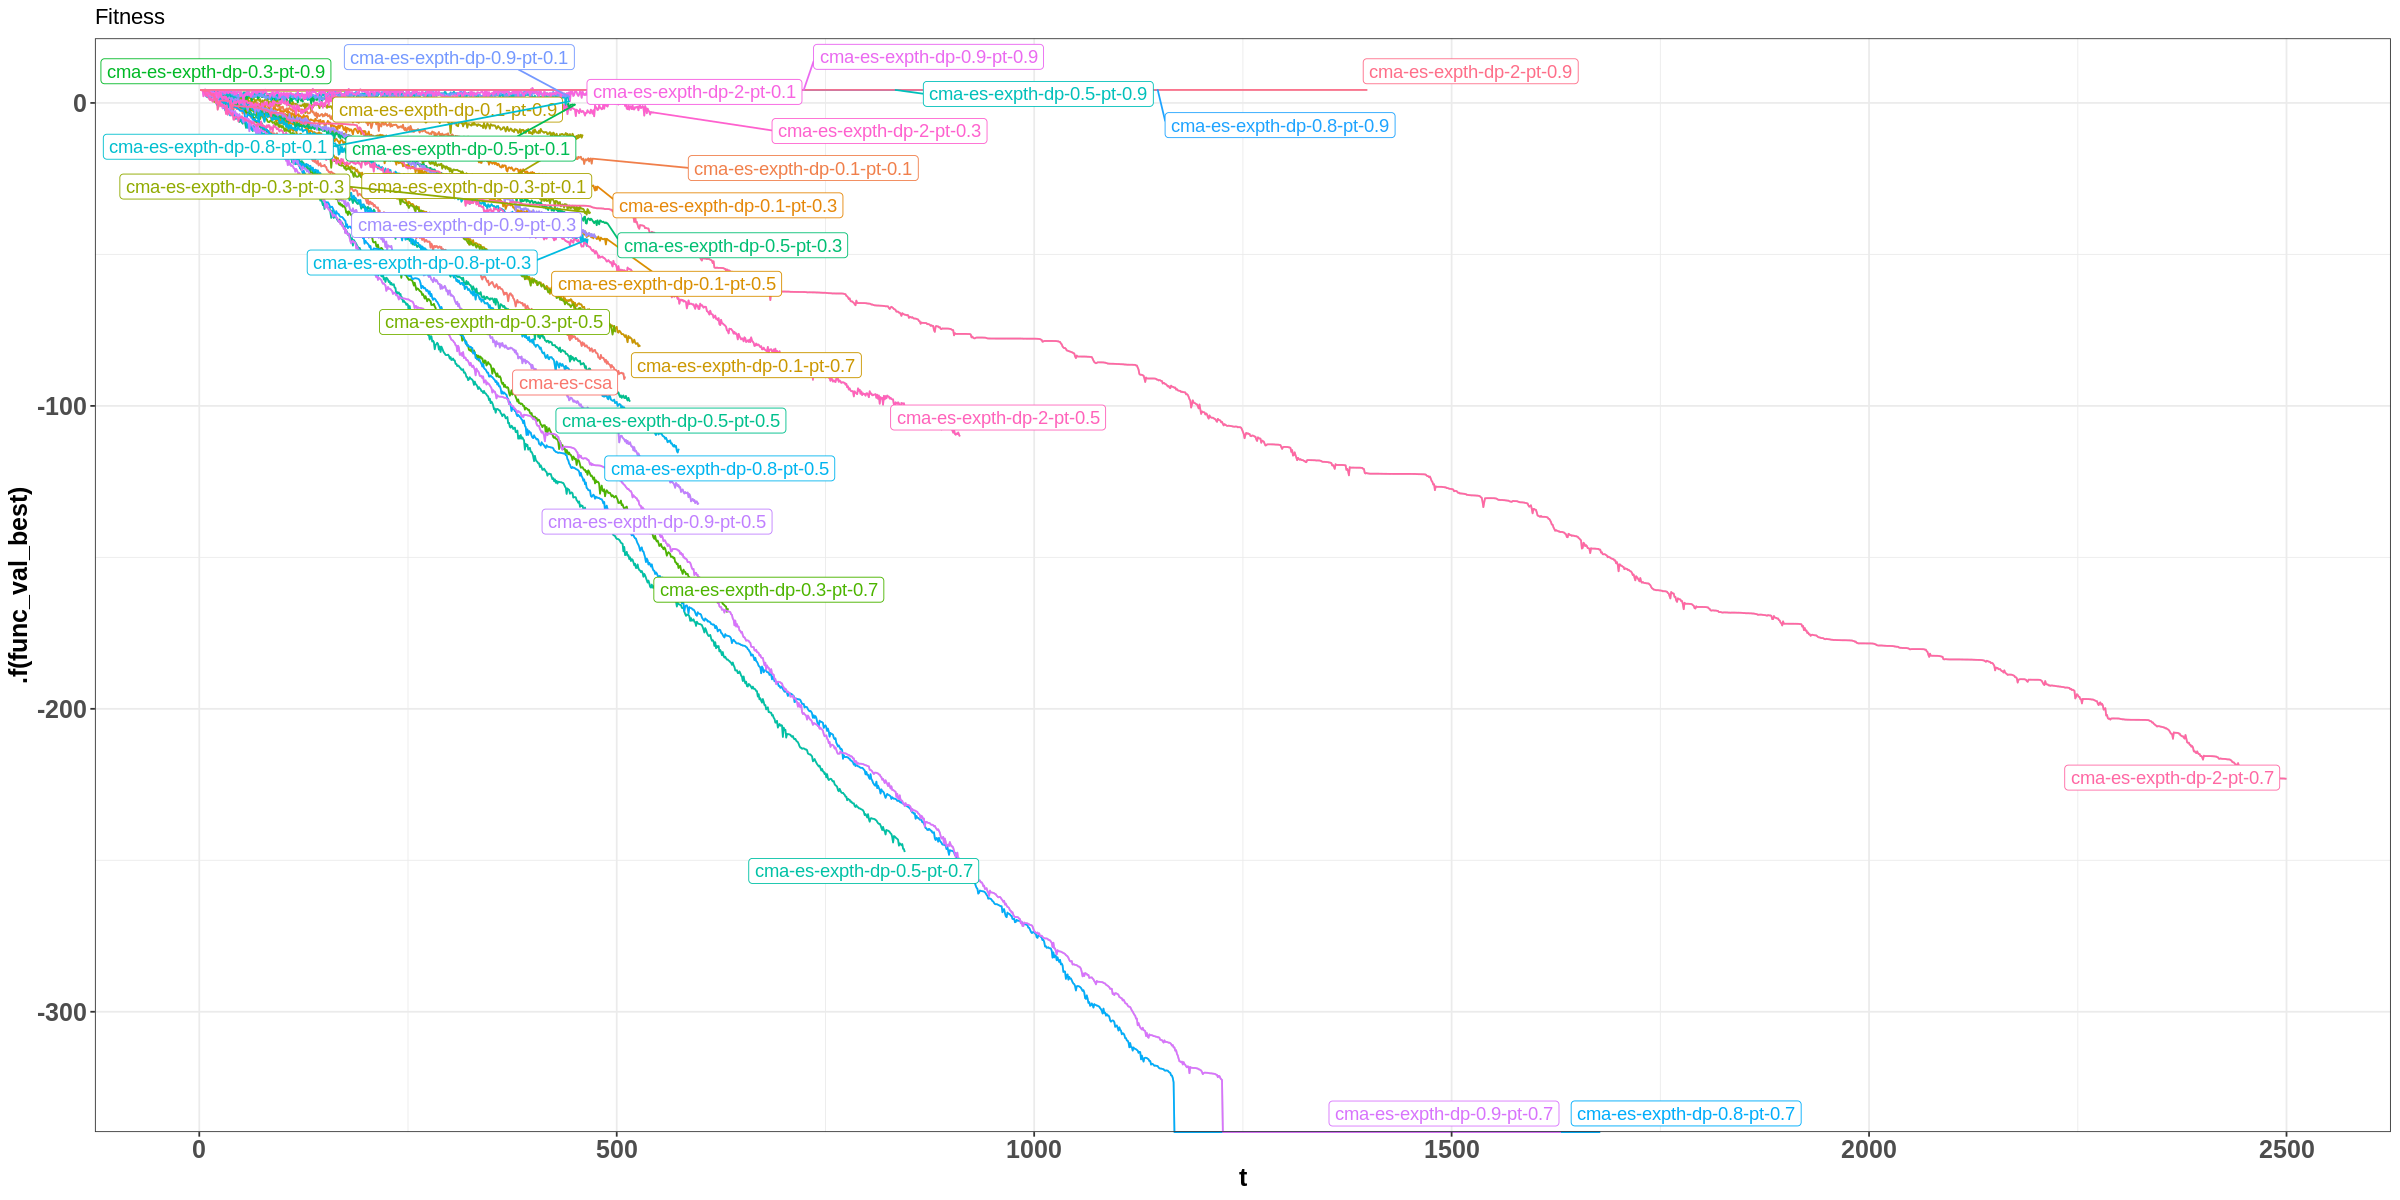

In [164]:
experiments %>%
    value_plot(.f = log10) +
    gghighlight::gghighlight(is.character(method), use_direct_label = TRUE)
    

In [167]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] gghighlight_0.3.0 here_0.1          furrr_0.1.0       future_1.17.0    
 [5] magrittr_1.5      forcats_0.5.0     stringr_1.4.0     dplyr_0.8.5      
 [9] purrr_0.3.3       readr_1.3.1       tidyr_1.0.2       tibble_2.1.3     
[13] ggplot2_3.3.0     tidyverse_1.3.0  

loaded via a namespace (and not attached):
 [1] ggre